In [0]:
import tensorflow as tf

In [0]:
mnist = tf.keras.datasets.mnist

In [0]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [0]:
## to make pixel values 0 tp 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [31]:
print('x_train_shape: ',x_train.shape,'x_test_shape: ',x_test.shape)

x_train_shape:  (60000, 28, 28) x_test_shape:  (10000, 28, 28)


In [0]:
from tensorflow.python.keras.layers import Flatten, Dense, Activation, Dropout

# **1. FULLY CONNECTED NETWORK**

In [0]:
model = tf.keras.models.Sequential()

In [0]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [0]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [0]:
model.fit(x_train,y_train, epochs=10,verbose=1)

Epoch 1/10
60000/60000 [==============================] - 10s 165us/sample - loss: 0.1864 - acc: 0.9424
Epoch 2/10
60000/60000 [==============================] - 9s 153us/sample - loss: 0.0795 - acc: 0.9753
Epoch 3/10
60000/60000 [==============================] - 9s 153us/sample - loss: 0.0543 - acc: 0.9833
Epoch 4/10
60000/60000 [==============================] - 9s 154us/sample - loss: 0.0401 - acc: 0.9873
Epoch 5/10
60000/60000 [==============================] - 9s 154us/sample - loss: 0.0333 - acc: 0.9891
Epoch 6/10
60000/60000 [==============================] - 9s 155us/sample - loss: 0.0291 - acc: 0.9907
Epoch 7/10
60000/60000 [==============================] - 9s 154us/sample - loss: 0.0240 - acc: 0.9920
Epoch 8/10
60000/60000 [==============================] - 9s 152us/sample - loss: 0.0212 - acc: 0.9934
Epoch 9/10
60000/60000 [==============================] - 9s 153us/sample - loss: 0.0189 - acc: 0.9937
Epoch 10/10
60000/60000 [==============================] - 9s 154us/samp

In [0]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 74us/sample - loss: 0.0903 - acc: 0.9817


[0.09032471820831142, 0.9817]

# 2. CNN

In [0]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [0]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

In [35]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [37]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 9s 154us/step - loss: 0.2044 - acc: 0.9372 - val_loss: 0.0571 - val_acc: 0.9814
Epoch 2/12
60000/60000 [==============================] - 9s 147us/step - loss: 0.0523 - acc: 0.9842 - val_loss: 0.0405 - val_acc: 0.9858
Epoch 3/12
60000/60000 [==============================] - 9s 146us/step - loss: 0.0343 - acc: 0.9895 - val_loss: 0.0344 - val_acc: 0.9887
Epoch 4/12
60000/60000 [==============================] - 9s 147us/step - loss: 0.0254 - acc: 0.9917 - val_loss: 0.0351 - val_acc: 0.9893
Epoch 5/12
60000/60000 [==============================] - 9s 148us/step - loss: 0.0185 - acc: 0.9943 - val_loss: 0.0309 - val_acc: 0.9909
Epoch 6/12
60000/60000 [==============================] - 9s 149us/step - loss: 0.0149 - acc: 0.9951 - val_loss: 0.0439 - val_acc: 0.9866
Epoch 7/12
60000/60000 [==============================] - 9s 148us/step - loss: 0.0116 - acc: 0.9965 - val_loss: 0.0290 - 

**Visualizing CNN**

In [38]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total para

In [0]:
import numpy as np
import matplotlib.pyplot as plt

**Conv layer 1 kernels**

In [0]:
with tf.Session() as sess:
     sess.run(tf.global_variables_initializer())
     w_layer1 = model.layers[0].get_weights()
     #weight_matrix = [layer.get_weights() for layer in model.layers[:2]]
     
     

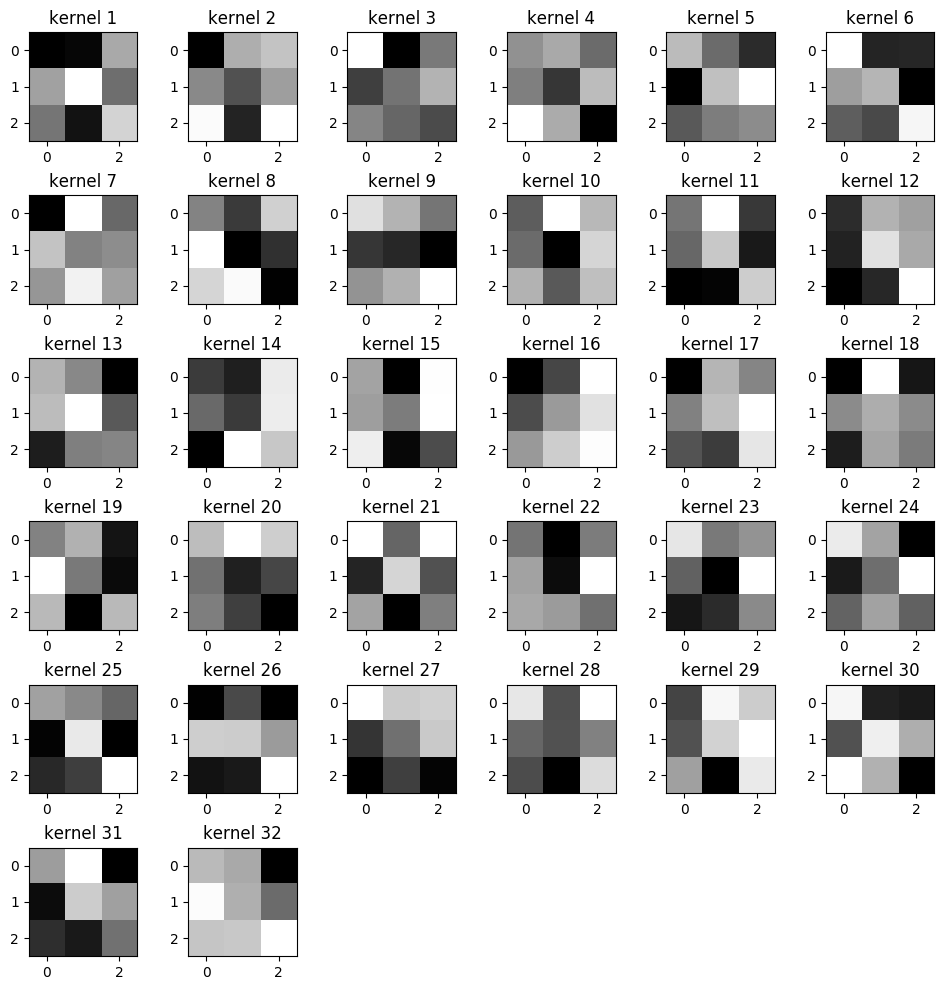

In [0]:
w = np.squeeze(w_layer1[0])
plt.style.use('default')
plt.figure(figsize=(12,12))
for i in range(1, w.shape[-1]+1):
  plt.subplot(6,6,i)
  plt.imshow(w[:,:,i-1], cmap='gray')
  plt.title('kernel '+str(i))
plt.subplots_adjust(hspace=0.5)
plt.show()

**Conv layer 2 kernels**

In [0]:
with tf.Session() as sess:
     sess.run(tf.global_variables_initializer())
     w_layer2 = model.layers[1].get_weights()

In [0]:
w_layer2[0].shape

(3, 3, 32, 64)

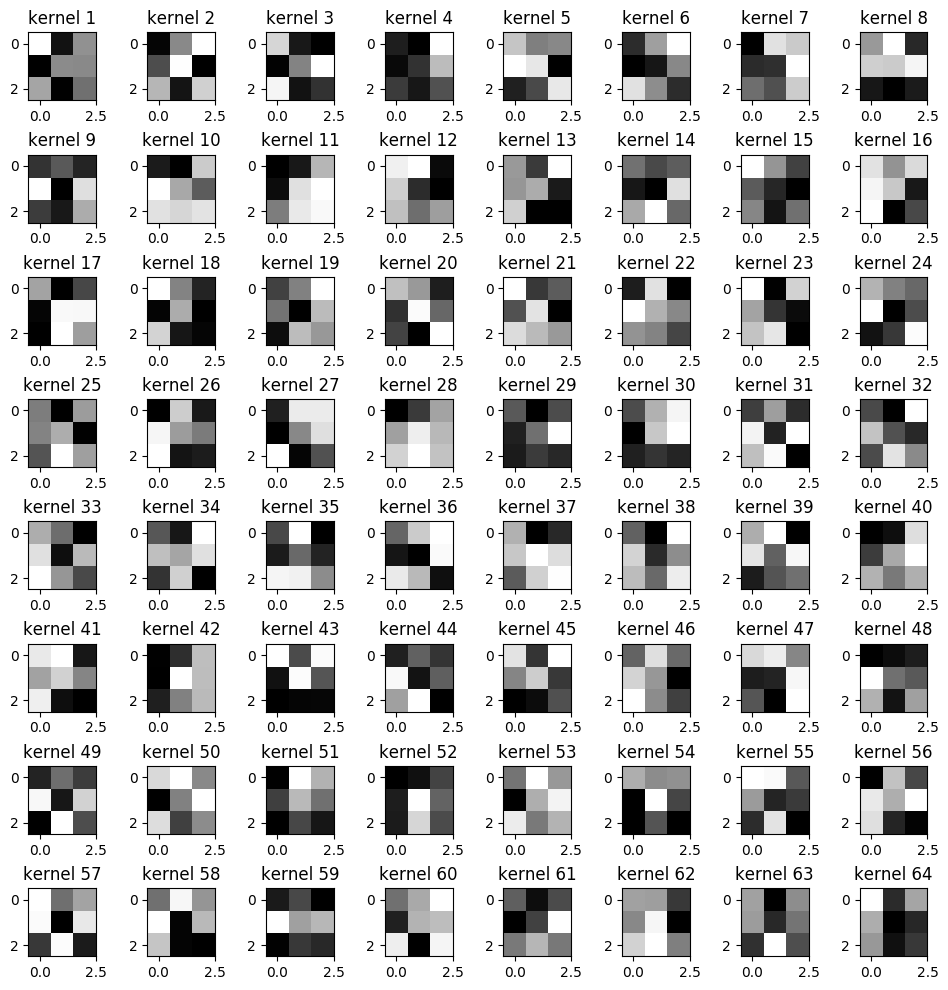

In [0]:
w = np.squeeze(w_layer2[0])
plt.style.use('default')
plt.figure(figsize=(12,12))
for i in range(1, w.shape[-1]+1):
  plt.subplot(8,8,i)
  plt.imshow(w[:,:,0,i-1], cmap='gray') ## plotting 1st out of 32 channels as kernel is 32 channels in depth
  plt.title('kernel '+str(i))
  
plt.subplots_adjust(hspace=0.8)
plt.show()


**Activation  map (feature map) of conv layer**

**1. conv layer 1**

In [0]:
output_layer1 = K.function([model.inputs[0], 
                        K.learning_phase()], 
                       [model.layers[0].output])

In [0]:
activations_1 = output_layer1([x_test[0].reshape(1,28,28,1)])[0]

In [86]:
activations_1.shape

(1, 26, 26, 32)

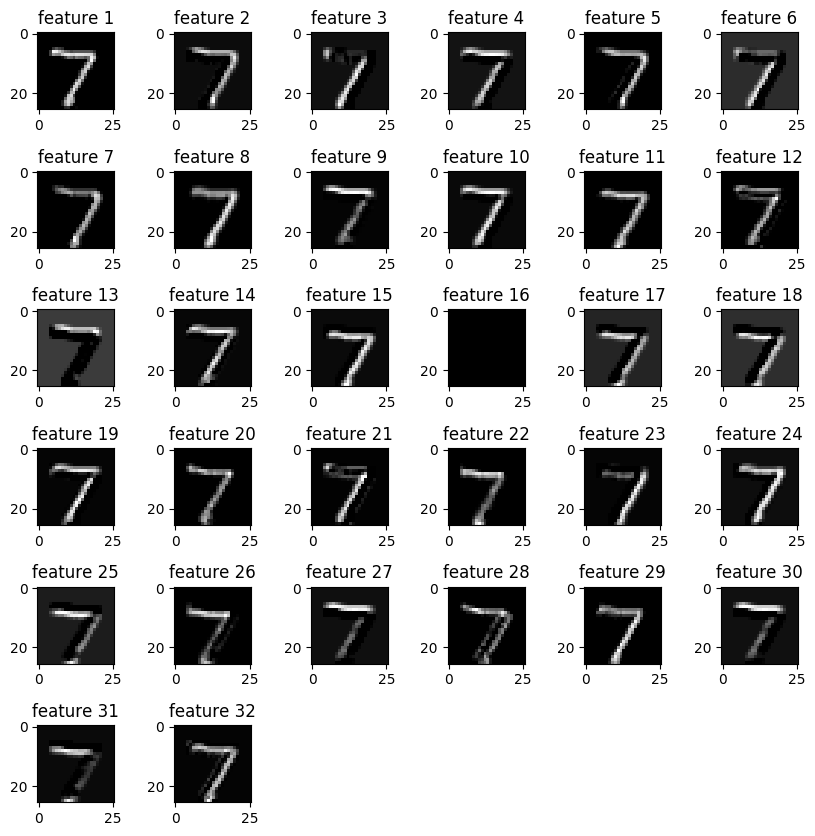

In [87]:
actvs = np.squeeze(activations_1)
plt.style.use('default')
plt.figure(figsize=(10,10))
for i in range(1, actvs.shape[-1]+1):
  plt.subplot(6,6,i)
  plt.imshow(actvs[:,:,i-1], cmap='gray') ## plotting 1st out of 32 channels as kernel is 32 channels in depth
  plt.title('feature '+str(i))
  
plt.subplots_adjust(wspace=0.5, hspace=0.8)
plt.show()

**2. conv layer 2**

In [0]:
output_layer2 = K.function([model.inputs[0], 
                        K.learning_phase()], 
                       [model.layers[1].output])

In [0]:
activations_2 = output_layer2([x_test[0].reshape(1,28,28,1)])[0]

In [90]:
activations_2.shape

(1, 24, 24, 64)

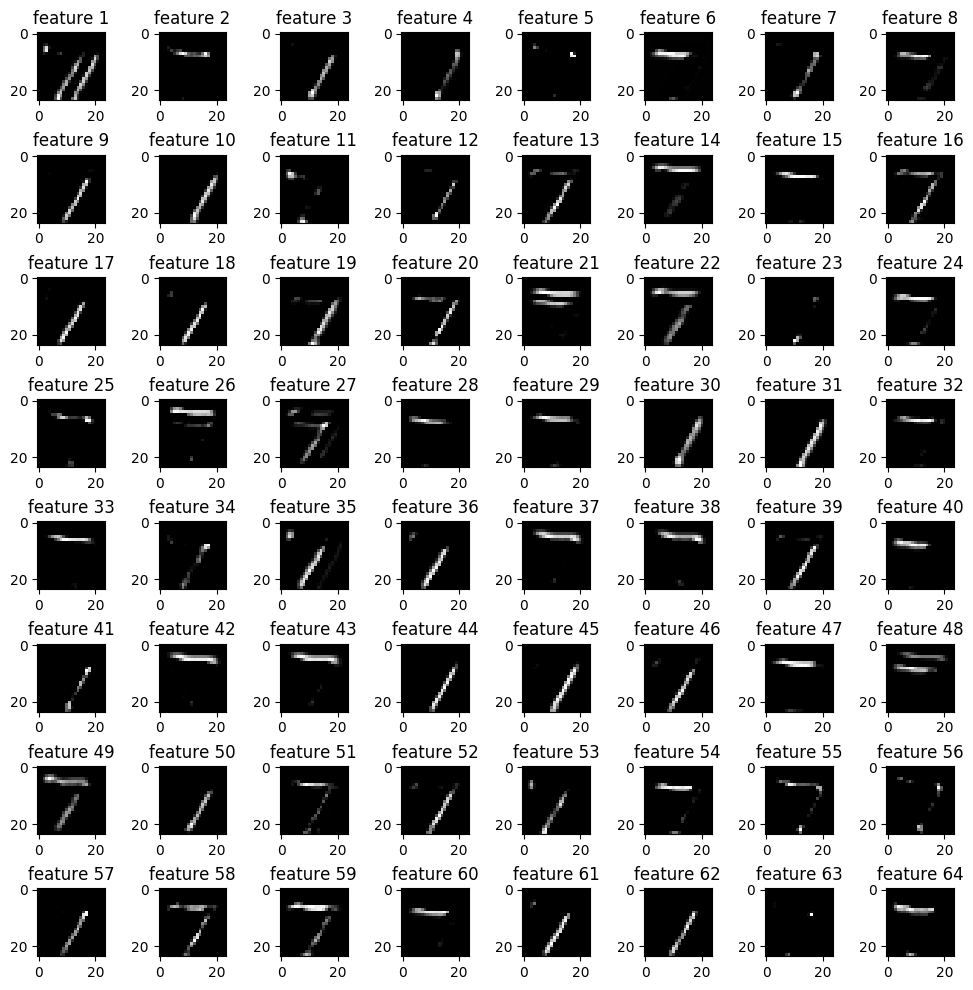

In [91]:
actvs = np.squeeze(activations_2)
plt.style.use('default')
plt.figure(figsize=(12,12))
for i in range(1, actvs.shape[-1]+1):
  plt.subplot(8,8,i)
  plt.imshow(actvs[:,:,i-1], cmap='gray') ## plotting 1st out of 32 channels as kernel is 32 channels in depth
  plt.title('feature '+str(i))
  
plt.subplots_adjust(wspace=0.5, hspace=0.8)
plt.show()